In [18]:
%matplotlib inline
#%matplotlib widget

In [19]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [20]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A
    

0.16098765432098766


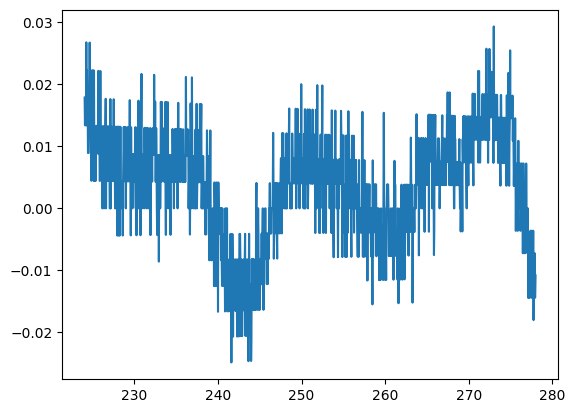

In [4]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack21_updated.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
all_linked_data_filename='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\all_linking_passive_data_21bots.csv'
all_linked_data=pd.read_csv(all_linked_data_filename,index_col=0)
expnum=36
delta_t=6
starting_time=100#seconds
ending_time=160#sec
exp_row=expSumPassive.iloc[expnum]
expnun_Filename=exp_row.linkingFileNamePack
data=all_linked_data[(all_linked_data['Filename']==expnun_Filename)]
data=data.iloc[(starting_time*25):(ending_time*25),0:4]
#first_line=data.iloc[0,:]
raw_diff=data.diff(periods=25*delta_t)
#raw_diff=data-first_line
#print(raw_diff)
#delta_r=np.sqrt(np.power(raw_diff.x,2)+np.power(raw_diff.y,2))
#print(delta_r)
time=data.frame/25
fig,ax = plt.subplots()
ax.plot(time,raw_diff.x/time)
#ax.axis([0.01,200,0,15])
mean_displacment=raw_diff.x.mean(axis=0,numeric_only=True,skipna=True)
mean_V= mean_displacment/delta_t
print(mean_V)

In [5]:
plt.hist(delta_r/time,bins=100)#,range=(0,10))

NameError: name 'delta_r' is not defined

In [21]:
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
delta_t=15 #seconds
starting_time=100#seconds
ending_time=160#sec
velocity_data=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    FileName=row.linkingFileNamePack
    print(FileName)
    data=all_linked_data[(all_linked_data['Filename']==FileName)]
    data=data.iloc[(starting_time*25):(ending_time*25),0:4]
    #first_line=data.iloc[0,:]
    #raw_diff=data-first_line
    #time=raw_diff.frame/25
    raw_diff=data.diff(periods=25*delta_t)
    #time=[delta_t]*len(raw_diff)
    delta_r=np.sqrt(np.power(raw_diff.x,2)+np.power(raw_diff.y,2))
    #v_of_center=delta_r/time
    mean_displacment=delta_r.mean(axis=0,numeric_only=True,skipna=True)
    mean_V= mean_displacment/delta_t
    mean_Vx=raw_diff.x.mean(axis=0,numeric_only=True,skipna=True)/delta_t
    mean_Vy=raw_diff.y.mean(axis=0,numeric_only=True,skipna=True)/delta_t
    row_data=pd.DataFrame()
    row_data['FileName']=[FileName]
    row_data['Bot_Type']=[row.bottype]
    row_data['diameter']=row['passiveDiameter[cm]']
    row_data['mean_Vx(per_1sec)']=[mean_Vx]
    row_data['mean_Vy(per_1sec)']=[mean_Vy]
    row_data['mean_Vr(per_1sec)']=[mean_V]
    velocity_data=pd.concat([velocity_data,row_data],axis=0,ignore_index=True)
print(velocity_data)
velocity_data.to_csv(passive_path+'\\mean_velocity(per_1sec)_21_bots.csv')

aligner_N021_D007_C0548.MP4_link.csv
aligner_N021_D007_C0547.MP4_link.csv
aligner_N021_D007_C0544.MP4_link.csv
aligner_N021_D007_C0542.MP4_link.csv
fronter_N021_D007_C0541.MP4_link.csv
fronter_N021_D007_C0540.MP4_link.csv
fronter_N021_D007_C0539.MP4_link.csv
fronter_N021_D007_C0538.MP4_link.csv
fronter_N021_D012_C0537.MP4_link.csv
fronter_N021_D012_C0536.MP4_link.csv
fronter_N021_D012_C0535.MP4_link.csv
fronter_N021_D012_C0534.MP4_link.csv
fronter_N021_D012_C0533.MP4_link.csv
aligner_N021_D012_C0532.MP4_link.csv
aligner_N021_D012_C0531.MP4_link.csv
updated_test_aligner_N021_D012_C0530.MP4_link.csv
aligner_N021_D012_C0529.MP4_link.csv
updated_test_aligner_N021_D018_C0527.MP4_link.csv
aligner_N021_D018_C0526.MP4_link.csv
aligner_N021_D018_C0525.MP4_link.csv
aligner_N021_D018_C0523.MP4_link.csv
fronter_N021_D018_C0521.MP4_link.csv
fronter_N021_D018_C0519.MP4_link.csv
fronter_N021_D018_C0514.MP4_link.csv
fronter_N021_D018_C0516.MP4_link.csv
fronter_N021_D018_C0517.MP4_link.csv
fronter_N021

In [22]:
mean_data=velocity_data.groupby(by=["Bot_Type","diameter"]).mean()
std_data=velocity_data.groupby(by=["Bot_Type","diameter"]).std()

C:\Users\User\AppData\Local\Temp\ipykernel_20504\1949981099.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_data=velocity_data.groupby(by=["Bot_Type","diameter"]).mean()
C:\Users\User\AppData\Local\Temp\ipykernel_20504\1949981099.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_data=velocity_data.groupby(by=["Bot_Type","diameter"]).std()


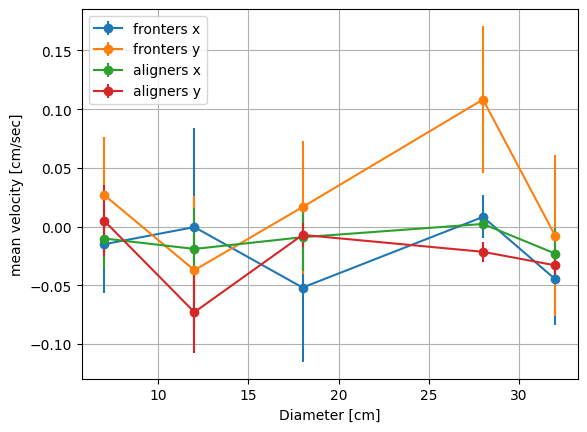

In [23]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
mpp = arenaSizeCm/arenaSizePixels/2
fronter_datax=mean_data.loc[("fronter","mean_Vx(per_1sec)")]
#print(fronter_data)
aligner_datax=mean_data.loc[("aligner","mean_Vx(per_1sec)")]
fronter_errx=std_data.loc[("fronter","mean_Vx(per_1sec)")]/2
aligner_errx=std_data.loc[("aligner","mean_Vx(per_1sec)")]/2
fronter_datay=mean_data.loc[("fronter","mean_Vy(per_1sec)")]
fronter_erry=std_data.loc[("fronter","mean_Vy(per_1sec)")]/2
aligner_datay=mean_data.loc[("aligner","mean_Vy(per_1sec)")]
#print(aligner_data)
aligner_erry=std_data.loc[("aligner","mean_Vy(per_1sec)")]/2
fig,ax = plt.subplots()
ax.errorbar(x=fronter_datax.index,y=fronter_datax*mpp,marker='o',label='fronters x',yerr=fronter_errx*mpp)
ax.errorbar(x=fronter_datay.index,y=fronter_datay*mpp,marker='o',label='fronters y',yerr=fronter_erry*mpp)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_datax.index,y=aligner_datax*mpp,marker='o',label='aligners x',yerr=aligner_errx*mpp)
ax.errorbar(x=aligner_datay.index,y=aligner_datay*mpp,marker='o',label='aligners y',yerr=aligner_erry*mpp)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('mean velocity [cm/sec]')
ax.grid()
ax.legend()

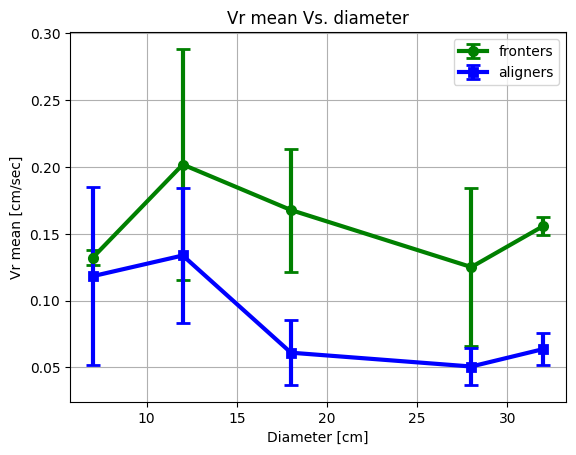

In [32]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
mpp = arenaSizeCm/arenaSizePixels/2
fronter_data=mean_data.loc[("fronter","mean_Vr(per_1sec)")]*mpp
aligner_data=mean_data.loc[("aligner","mean_Vr(per_1sec)")]*mpp

fronter_err=std_data.loc[("fronter","mean_Vr(per_1sec)")]/2*mpp
aligner_err=std_data.loc[("aligner","mean_Vr(per_1sec)")]/2*mpp

fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_data,label='fronters',yerr=fronter_err,marker='o',capsize=5,color='green'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
ax.errorbar(x=aligner_data.index,y=aligner_data,label='aligners',yerr=aligner_err,marker='s',capsize=5,color='blue'
             ,markeredgewidth=2,elinewidth=3,linewidth=3)
ax.grid()
ax.legend()
ax.set_title('Vr mean Vs. diameter')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('Vr mean [cm/sec]')
saved_data=pd.DataFrame(data={'fronter_data':fronter_data,'fronter_err':fronter_err
                              ,'aligner_data':aligner_data,'aligner_err':aligner_err})
saved_data.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\mean_Vr_vs_diameter_21bots.csv')
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\mean_Vr_vs_diameter_21bots.png',bbox_inches='tight')

diameter
7     0.985725
12    1.185677
18    1.443404
28    0.900529
32    1.074923
Name: mean_velocity(per_1sec), dtype: float64
diameter
7     0.716573
12    0.756039
18    0.417779
28    0.444000
32    0.325788
Name: mean_velocity(per_1sec), dtype: float64


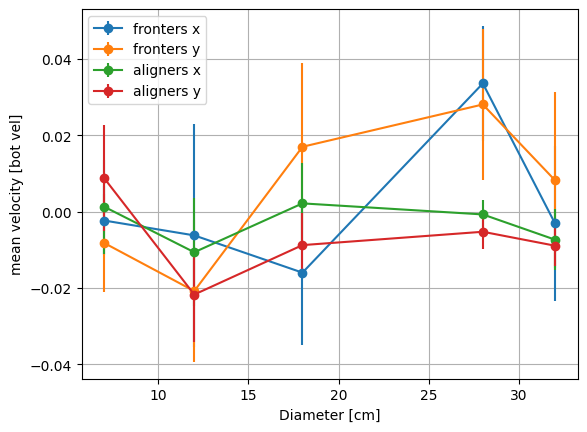

In [80]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
mpp = arenaSizeCm/arenaSizePixels
fronter_datax=mean_data.loc[("fronter","mean_Vx(per_1sec)")]
print(fronter_data)
aligner_datax=mean_data.loc[("aligner","mean_Vx(per_1sec)")]
fronter_errx=std_data.loc[("fronter","mean_Vx(per_1sec)")]/2
aligner_errx=std_data.loc[("aligner","mean_Vx(per_1sec)")]/2
fronter_datay=mean_data.loc[("fronter","mean_Vy(per_1sec)")]
fronter_erry=std_data.loc[("fronter","mean_Vy(per_1sec)")]/2
aligner_datay=mean_data.loc[("aligner","mean_Vy(per_1sec)")]
print(aligner_data)
aligner_erry=std_data.loc[("aligner","mean_Vy(per_1sec)")]/2
fig,ax = plt.subplots()
ax.errorbar(x=fronter_data.index,y=fronter_datax*mpp/5,marker='o',label='fronters x',yerr=fronter_errx*mpp/5)
ax.errorbar(x=fronter_data.index,y=fronter_datay*mpp/5,marker='o',label='fronters y',yerr=fronter_erry*mpp/5)
#ax.plot(fronter_data_max.index,fronter_data_max,'-o',label='fronter_n_max')
ax.errorbar(x=aligner_data.index,y=aligner_datax*mpp/5,marker='o',label='aligners x',yerr=aligner_errx*mpp/5)
ax.errorbar(x=aligner_data.index,y=aligner_datay*mpp/5,marker='o',label='aligners y',yerr=aligner_erry*mpp/5)
#ax.plot(aligner_data_max.index,aligner_data_max,'-o',label='aligners_n_max')
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('mean velocity [bot vel]')
ax.grid()
ax.legend()
